In [1]:
import cv2

In [ ]:
import cv2

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
print(face_cascade)
img = cv2.imread("lena.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

cv2.imshow("frame", img)

while True:
    k=cv2.waitKey()
    if k == ord("q"):
        break
cv2.destroyAllWindows()

<CascadeClassifier 0000025E0B940790>


(2, 60)
(2, 120)
eps : 0.100000, p: 3.000000, nb_classe: -1
eps : 0.100000, p: 5.000000, nb_classe: -1
eps : 0.100000, p: 10.000000, nb_classe: -1
eps : 0.300000, p: 3.000000, nb_classe: 11
eps : 0.300000, p: 5.000000, nb_classe: 1
eps : 0.300000, p: 10.000000, nb_classe: -1
eps : 0.800000, p: 3.000000, nb_classe: 2
eps : 0.800000, p: 5.000000, nb_classe: 1
eps : 0.800000, p: 10.000000, nb_classe: 1
eps : 2.000000, p: 3.000000, nb_classe: 1
eps : 2.000000, p: 5.000000, nb_classe: 1
eps : 2.000000, p: 10.000000, nb_classe: 1
eps : 6.000000, p: 3.000000, nb_classe: 0
eps : 6.000000, p: 5.000000, nb_classe: 0
eps : 6.000000, p: 10.000000, nb_classe: 0


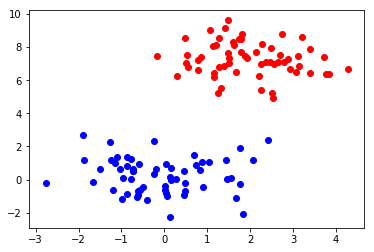

In [11]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

set1 = np.random.randn(2,60) + np.array([[2,7]]*60).transpose()
set2 = np.random.randn(2,60)

print(set1.shape)

plt.scatter(set1[0,:], set1[1,:], c='r')
plt.scatter(set2[0,:], set2[1,:], c='b')

training_set = np.concatenate([set1,set2], axis=1)
print(training_set.shape)

for eps, m in product([0.1,0.3,0.8,2,6],[3,5,10]):
    db = DBSCAN(eps=eps, min_samples=m)
    db.fit(training_set.transpose())
    colors = db.labels_
    print("eps : %f, m: %f, nb_classe: %d"%(eps, m, max(db.labels_)))
plt.show()

(2, 60)
(2, 120)


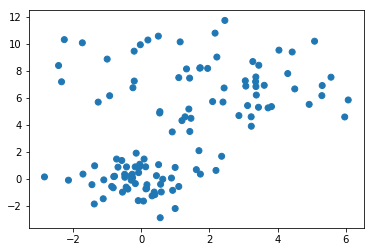

In [17]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

set1 = np.random.randn(2,60) * 2  + np.array([[2,7]]*60).transpose()
set2 = np.random.randn(2,60)

print(set1.shape)

# plt.scatter(set1[0,:], set1[1,:], c='r')
# plt.scatter(set2[0,:], set2[1,:], c='b')

eps = 2
m = 3

training_set = np.concatenate([set1,set2], axis=1)
print(training_set.shape)

db = DBSCAN(eps=eps, min_samples=m)
db.fit(training_set.transpose())
colors = db.labels_

plt.scatter(training_set[0,:], training_set[1,:], c=db.labels_, cmap='tab20')

plt.show()